<a href="https://colab.research.google.com/github/Lazar-Wolfe/AI-for-Eco-AI60003-/blob/main/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense, Activation

In [4]:
print(f"pandas=={pd.__version__}")
print(f"numpy=={np.__version__}")
print(f"sklearn=={sklearn.__version__}")
print(f"tensorflow=={tf.__version__}")
print(f"keras=={keras.__version__}")

pandas==1.3.5
numpy==1.21.6
sklearn==1.0.2
tensorflow==2.9.2
keras==2.9.0


In [5]:
csv_path = "https://raw.githubusercontent.com/curiousily/Deep-Learning-For-Hackers/master/data/3.stock-prediction/BTC-USD.csv"
df = pd.read_csv(csv_path, parse_dates=['Date'])
df = df.sort_values('Date')

In [6]:
scaler = MinMaxScaler()

close_price = df.Close.values.reshape(-1, 1)

scaled_close = scaler.fit_transform(close_price)

In [7]:
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)

In [8]:
SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test =\
 preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

In [9]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

model = keras.Sequential()

model.add(Bidirectional(
  GRU(WINDOW_SIZE, return_sequences=True),
  input_shape=(WINDOW_SIZE, X_train.shape[-1])
))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(
  GRU((WINDOW_SIZE * 2), return_sequences=True)
))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(
  GRU(WINDOW_SIZE, return_sequences=False)
))

model.add(Dense(units=1))

model.add(Activation('linear'))

In [10]:
BATCH_SIZE = 64

model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1
)

Epoch 1/30
42/42 [==============================] - 18s 83ms/step - loss: 5.5202e-04 - val_loss: 0.0151
Epoch 2/30
42/42 [==============================] - 2s 38ms/step - loss: 0.0067 - val_loss: 0.0462
Epoch 3/30
42/42 [==============================] - 2s 37ms/step - loss: 0.0129 - val_loss: 0.0540
Epoch 4/30
42/42 [==============================] - 2s 37ms/step - loss: 0.0144 - val_loss: 0.0647
Epoch 5/30
42/42 [==============================] - 2s 38ms/step - loss: 0.0226 - val_loss: 0.0524
Epoch 6/30
42/42 [==============================] - 2s 38ms/step - loss: 0.0055 - val_loss: 0.0127
Epoch 7/30
42/42 [==============================] - 2s 38ms/step - loss: 0.0083 - val_loss: 0.0222
Epoch 8/30
42/42 [==============================] - 2s 39ms/step - loss: 0.0191 - val_loss: 0.1051
Epoch 9/30
42/42 [==============================] - 2s 38ms/step - loss: 0.0153 - val_loss: 0.0876
Epoch 10/30
42/42 [==============================] - 2s 38ms/step - loss: 0.0111 - val_loss: 0.0539
Epoc

In [11]:
y_hat = model.predict(X_test)

5/5 [==============================] - 3s 20ms/step


In [12]:
y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)

In [13]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 24ms/step - loss: 0.0017


0.0017026746645569801

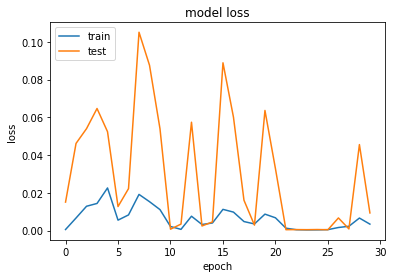

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rc

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

5/5 [==============================] - 0s 27ms/step


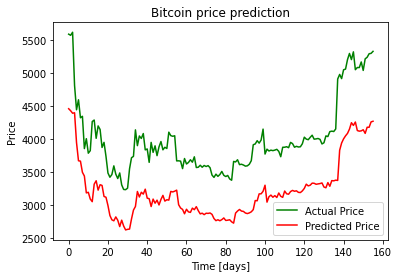

In [17]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();